| | |
|--|--|
| **Names** | *Thomas Brus & Jan Ubbo van Baardewijk* |
| **Group** | *ML_HMI_01* |

In [29]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import operator
import pylab

pylab.rcParams['figure.figsize'] = (10.0, 8.0)


# Bayesian Decision Theory

In this lab, we will create generative models of data. The data that we will use is the same as in the lab on logistic regression, and we will create a model where we use 2-dimensional Gaussian distributions to describe the data in each class. We then use Bayes' rule to compute the probability of a datapoint belonging to a certain class.

So, first, let's load the data.

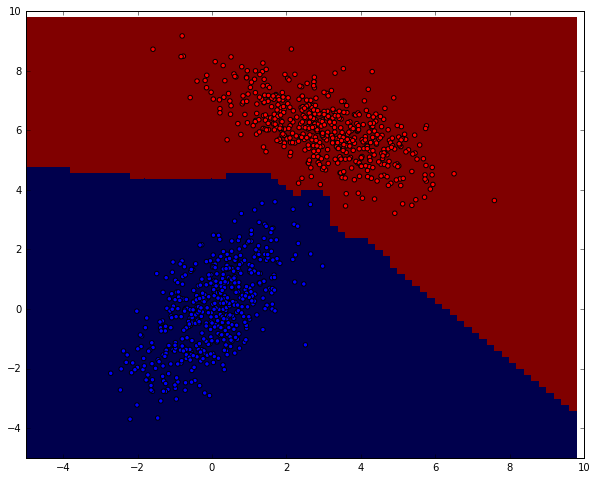

In [30]:
# This code is given

data = np.load("data-2class.npz")
d = data['d']
l = data['l'].ravel()

colours = [ [ 'b', 'r' ][int(x)] for x in np.nditer(l)]

# Code for plotting the heat map
import time
from IPython import display

xx,yy = np.mgrid[-5:10:.2,-5:10:.2]
def plotHeat(f):
    """ Plot a heatmap for an arbitrary function"""
    display.clear_output(wait=True)
    display.display(plt.gcf())
    p = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            p[i,j] = f(xx[i,j], yy[i,j])
    plt.pcolor(xx,yy,p,cmap='seismic')
    plt.xlim([-5,10])
    plt.ylim([-5,10])
    plt.scatter(d[:,0],d[:,1],20,colours)
    time.sleep(.01)

def nn(x,y):
    # Example to show how to use the plotHeat function, implements 1-nearest-neighbour
    mindist = 1e200
    bestl = 0
    for p,t in zip(d, l):
        dist = (p[0]-x)**2+(p[1]-y)**2
        if dist<mindist:
            mindist = dist
            bestl = t
    return bestl

plotHeat(nn)

## Unconstrained model

$$
\newcommand{\x}{\mathbf{x}}
\newcommand{\c}{\mathcal{C}}
\newcommand{\mean}{\boldsymbol{\mu}}
\newcommand{\cov}{\boldsymbol{\Sigma}}
$$

In this first exercise, we will create two normal distributions, one for each class. The probability density at a datapoint, given that it belongs to class one, is given by:
$$
p(\x|\c_1) = \frac{1}{\sqrt{(2\pi)^k |\cov_1|}} \exp-\frac12 (\x-\mean_1)^\top \cov_1^{-1} (\x-\mean_1)
$$
where $k$ is the dimensionality of the data (in this case, 2), $\mean_1$ is the mean of the data and $\cov_1$ is the covariance of the data. The probability density for a datapoint belonging to class two is given analogously, with its own parameters $\mean_2$ and $\cov_2$.

**Question 1 [5 credits]**
Split your dataset into 80\% training set and 20% test set. Using the train set, learn the two Gaussian distributions for the two classes 

In [31]:
# Q1 
split = int(0.8 * len(d))
training_set = d[0:split]
test_set = d[split:len(d)]
l_train = l[0:split]
l_test = l[split:len(l)]

class_a = np.array([t for t, t_l in zip(training_set, l_train) if t_l == 0])
class_b = np.array([t for t, t_l in zip(training_set, l_train) if t_l == 1])

mean_a = np.mean(class_a, axis=0)
mean_b = np.mean(class_b, axis=0)

cov_a = np.cov(class_a, rowvar=0)
cov_b = np.cov(class_b, rowvar=0)

def p_x(x, y, mean, cov):
    pd = st.multivariate_normal.pdf([x, y], mean, cov)
    return pd

print(p_x_a(class_a[0,0], class_a[0,1]))

0.131584439873


**Question 2 [5 credits]**
Write down Bayes' rule to compute $p(\c_1|\x)$, and implement it. Plot the discriminant using the code provided. What is the performance of the model on the test set?

* Bayes' rule
$$
p(\c_1|\x) = \frac{p(\x|\c_1)*p(\c_1)}{p(\x)}
$$

performance on test set: 
1.0


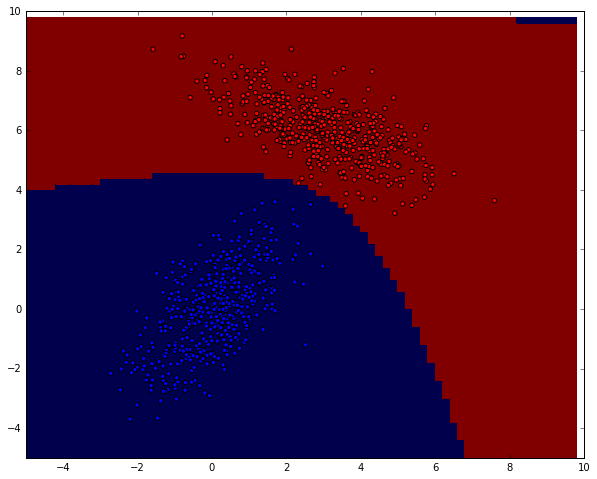

In [32]:
# Answer to q2
from __future__ import division

p_a = len(class_a)/(len(class_a)+len(class_b))
p_b = len(class_b)/(len(class_a)+len(class_b))

def classify(x, y):
    return (p_x(x, y, mean_a, cov_a) * p_a)<(p_x(x, y, mean_b, cov_b)*p_b)

plotHeat(classify)

correct=0
for t, l in zip(test_set, l_test):
    if classify(t[0],t[1])==l:
        correct=correct+1
        
print("performance on test set: ")
print(correct/len(test_set))

## Constrained model

**Question 3 [5 credits]**
Now, let's look at a constrained model. How would you compute the means and covariances of the two classes, if you want to enforce that the covariances of the two classes are identical? Implement your answer, and plot the discriminant. What is the performance on the test set?

According to http://www.clsp.jhu.edu/~damianos/ita_ucsd09_hlda.pdf and http://www.research.ibm.com/people/r/rameshg/gopinath-slt98.pdf, this covariance can be estimated by a weighted sum of the covariance matrices of both datasets (known as the within-class-covariance):
$$
\widehat{\cov}_1 = \widehat{\cov}_2 
= \sum\nolimits_{j}\frac{N_c}{N}\overline{\cov_c}
$$
The mean is again estimated by the sample mean:
$$
\widehat{\mean} = \overline{\mean}
$$

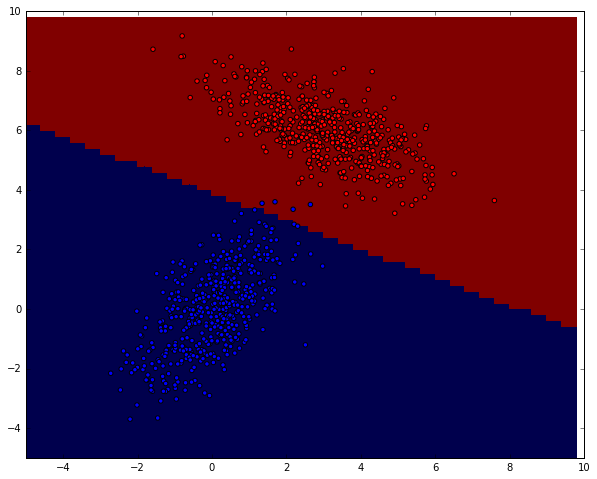

In [44]:
# Q3
est_cov = (len(class_a)/len(training_set) * cov_a + len(class_b)/len(training_set) * cov_b)
print (cov_a)
print (cov_b)
print (est_cov)

def classify_equal_cov(x, y):
    return (p_x(x, y, mean_a, est_cov) * p_a)<(p_x(x, y, mean_b, est_cov)*p_b)

plotHeat(classify_equal_cov)

**Question 4 [5 credits]**
Let us enforce a different type of constraint. The covariances of both distributions are now not identical, but each covariance is diagonal (that is, the matrix contains only variances, not co-variances). Implement this and plot the distributions overlaid on the dataset. What is the performance on the test set? What does the discriminant look like?

In [ ]:
# Q4

**Question 5 [5 credits]**
Finally, implement and test the model where you enforce spherical covariances. That is, there are no covariance terms in the matrix, and the variances are the same along all dimensions. Plot the distributions, the discriminant and compute the performance on the test set.

In [ ]:
# Q5